서포트 벡터 머신
- Support Vector Machine (SVM)
- 커널 기법을 활용한 알고리즘

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

유방암 데이터

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
np.bincount(cancer.target)

array([212, 357], dtype=int64)

In [6]:
357 / (212+357)

0.6274165202108963

In [7]:
cancer.data.shape

(569, 30)

In [8]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

SVC 적용

In [9]:
from sklearn.svm import SVC

In [10]:
X = cancer.data[:, :2]
y = cancer.target

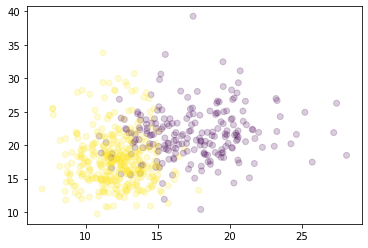

In [11]:
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.2)

In [12]:
model = SVC(probability=True) # probability: 확률점수 계산
model.fit(X, y)
model.score(X, y)

0.9121265377855887

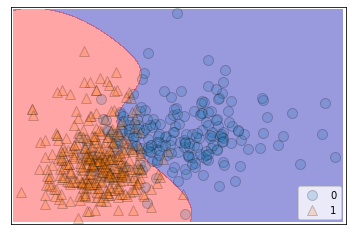

In [13]:
#결과 출력
import mglearn
#mglearn.plots.plot_2d_classification(model, X, fill=True, eps=0.5, alpha=0.4)
mglearn.plots.plot_2d_separator(model, X, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X[:,0], X[:,1], y, alpha=0.2)
plt.legend(loc=4)

Text(0.5, 1.0, 'SVM - decision bounds')

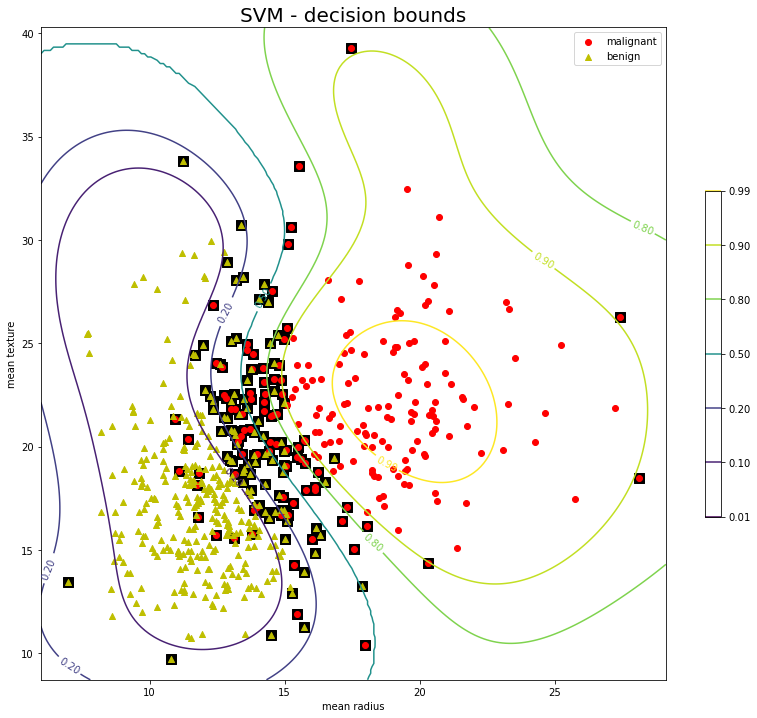

In [14]:
xmax = X[:,0].max()+1
xmin = X[:,0].min()-1
ymax = X[:,1].max()+1
ymin = X[:,1].min()-1

xx=np.linspace(xmin,xmax,200)
yy=np.linspace(ymin,ymax,200)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
decision_values = model.predict_proba(X_grid)[:,0] # 등고선을 위해 확률점수를 구함

sv=model.support_vectors_

fig=plt.figure(figsize=[14,12])

# show probability countour
CS=plt.contour(data1,data2,decision_values.reshape(data1.shape),levels=[0.01, 0.1, 0.2, 0.5, 0.8, 0.9, 0.99])
plt.clabel(CS, inline=2, fontsize=10)

# show support vectors
plt.scatter(sv[:,0], sv[:,1], marker='s', c= 'k', s=100)

# show train samples
plt.scatter(X[:,0][y==0],X[:,1][y==0],marker='o',c='r',label='malignant')
plt.scatter(X[:,0][y==1],X[:,1][y==1],marker='^',c='y',label='benign')

plt.legend()
plt.colorbar(CS,shrink=0.5)
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.title('SVM - decision bounds',fontsize=20)

SVC 중요 옵션
- C
- gamma

In [15]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [16]:
model = SVC(C=10, gamma=10)
model.fit(X, y)
model.score(X, y)

0.9947275922671354

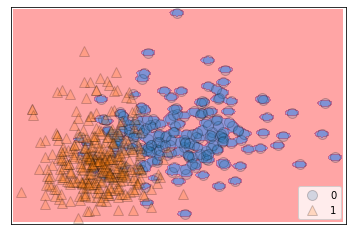

In [17]:
mglearn.plots.plot_2d_separator(model, X, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X[:,0], X[:,1], y, alpha=0.2)
plt.legend(loc=4)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
model = SVC(C=10, gamma=10)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7832167832167832

In [20]:
model = SVC(C=0.1, gamma=0.1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8951048951048951

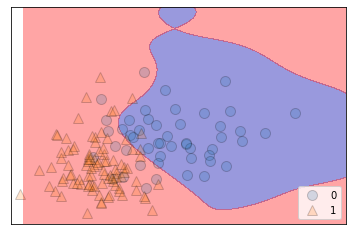

In [21]:
import mglearn
mglearn.plots.plot_2d_separator(model, X_train, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, alpha=0.2)
plt.legend(loc=4)

과적합 이슈
- C=10, gamma=10 일때의 결과가 과연 좋은것인가?
- 학습/테스트 데이터를 분리해서 결과를 보자

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 2), (143, 2), (426,), (143,))

In [24]:
model = SVC(C=10, gamma=10)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score  = model.score(X_test, y_test)
print(train_score, test_score)

0.9976525821596244 0.7482517482517482


In [25]:
np.bincount(y_test)

array([57, 86], dtype=int64)

In [26]:
89/(54+89)

0.6223776223776224

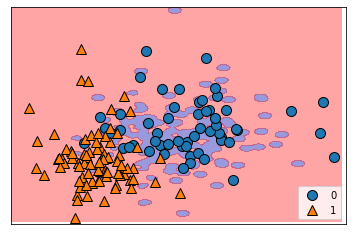

In [27]:
mglearn.plots.plot_2d_separator(model, X, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)
plt.legend(loc=4)